In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"C:\Users\online\Downloads\genres_v2.csv")

C:\Users\online\AppData\Local\Temp\ipykernel_8724\3028368226.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\online\Downloads\genres_v2.csv")


In [3]:
df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence  ...                      id  \
0              0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1              0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2              0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3              0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4              0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   
...                 ...       ...      ...  ...                     ...   
42300          0.000345    0.1210   0.3940  ...  46bXU7Sgj7104ZoXxzz9tM   
42301          0.000018    0.2050   0.3830  ...  0he2ViGMUO3ajKTxLOfWVT   
42302          0.000242    0.3850   0.1240  ...  72DAt9Lbpy9EUS29OzQLob   
42303          0.029600    0.0575   0.4880  ...  6HXgExFVuE1c3cq9QjFCcU   
42304          0.000055    0.4140   0.1340  ...  6MAAMZImxcvYhRnxDLTufD   

                                        uri  \
0      spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1      spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2      spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3      spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4      spotify:track:4jCeguq9rMTlbMmPHuO7S3   
...                                     ...   
42300  spotify:track:46bXU7Sgj7104ZoXxzz9tM   
42301  spotify:track:0he2ViGMUO3ajKTxLOfWVT   
42302  spotify:track:72DAt9Lbpy9EUS29OzQLob   
42303  spotify:track:6HXgExFVuE1c3cq9QjFCcU   
42304  spotify:track:6MAAMZImxcvYhRnxDLTufD   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1      https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2      https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3      https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4      https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   
...                                                  ...   
42300  https://api.spotify.com/v1/tracks/46bXU7Sgj710...   
42301  https://api.spotify.com/v1/tracks/0he2ViGMUO3a...   
42302  https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...   
42303  https://api.spotify.com/v1/tracks/6HXgExFVuE1c...   
42304  https://api.spotify.com/v1/tracks/6MAAMZImxcvY...   

                                            analysis_url duration_ms  \
0      https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1      https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2      https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3      https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4      https://api.spotify.com/v1/audio-analysis/4jCe...      123298   
...                                                  ...         ...   
42300  https://api.spotify.com/v1/audio-analysis/46bX...      269208   
42301  https://api.spotify.com/v1/audio-analysis/0he2...      210112   
42302  https://api.spotify.com/v1/audio-analysis/72DA...      234823   
42303  https://api.spotify.com/v1/audio-analysis/6HXg...      323200   
42304  https://api.spotify.com/v1/audio-analysis/6MAA...      162161   

      

In [4]:
df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4  Dark Trap                                          Venom   

  Unnamed: 0 title  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  
4        NaN   NaN  

[5 rows x 22 columns]

In [5]:
df.tail()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence  ...                      id  \
42300          0.000345    0.1210    0.394  ...  46bXU7Sgj7104ZoXxzz9tM   
42301          0.000018    0.2050    0.383  ...  0he2ViGMUO3ajKTxLOfWVT   
42302          0.000242    0.3850    0.124  ...  72DAt9Lbpy9EUS29OzQLob   
42303          0.029600    0.0575    0.488  ...  6HXgExFVuE1c3cq9QjFCcU   
42304          0.000055    0.4140    0.134  ...  6MAAMZImxcvYhRnxDLTufD   

                                        uri  \
42300  spotify:track:46bXU7Sgj7104ZoXxzz9tM   
42301  spotify:track:0he2ViGMUO3ajKTxLOfWVT   
42302  spotify:track:72DAt9Lbpy9EUS29OzQLob   
42303  spotify:track:6HXgExFVuE1c3cq9QjFCcU   
42304  spotify:track:6MAAMZImxcvYhRnxDLTufD   

                                              track_href  \
42300  https://api.spotify.com/v1/tracks/46bXU7Sgj710...   
42301  https://api.spotify.com/v1/tracks/0he2ViGMUO3a...   
42302  https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...   
42303  https://api.spotify.com/v1/tracks/6HXgExFVuE1c...   
42304  https://api.spotify.com/v1/tracks/6MAAMZImxcvY...   

                                            analysis_url duration_ms  \
42300  https://api.spotify.com/v1/audio-analysis/46bX...      269208   
42301  https://api.spotify.com/v1/audio-analysis/0he2...      210112   
42302  https://api.spotify.com/v1/audio-analysis/72DA...      234823   
42303  https://api.spotify.com/v1/audio-analysis/6HXg...      323200   
42304  https://api.spotify.com/v1/audio-analysis/6MAA...      162161   

      time_signature      genre  song_name Unnamed: 0  \
42300              4  hardstyle        NaN    20995.0   
42301              4  hardstyle        NaN    20996.0   
42302              4  hardstyle        NaN    20997.0   
42303              4  hardstyle        NaN    20998.0   
42304              4  hardstyle        NaN    20999.0   

                             title  
42300           Euphoric Hardstyle  
42301  Greatest Hardstyle Playlist  
42302       Best of Hardstyle 2020  
42303           Euphoric Hardstyle  
42304       Best of Hardstyle 2020  

[5 rows x 22 columns]

In [6]:
df.describe()

danceability        energy           key      loudness          mode  \
count  42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
mean       0.639364      0.762516      5.370240     -6.465442      0.549462   
std        0.156617      0.183823      3.666145      2.941165      0.497553   
min        0.065100      0.000243      0.000000    -33.357000      0.000000   
25%        0.524000      0.632000      1.000000     -8.161000      0.000000   
50%        0.646000      0.803000      6.000000     -6.234000      1.000000   
75%        0.766000      0.923000      9.000000     -4.513000      1.000000   
max        0.988000      1.000000     11.000000      3.148000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  42305.000000  42305.000000      42305.000000  42305.000000   
mean       0.136561      0.096160          0.283048      0.214079   
std        0.126168      0.170827          0.370791      0.175576   
min        0.022700      0.000001          0.000000      0.010700   
25%        0.049100      0.001730          0.000000      0.099600   
50%        0.075500      0.016400          0.005940      0.135000   
75%        0.193000      0.107000          0.722000      0.294000   
max        0.946000      0.988000          0.989000      0.988000   

            valence         tempo    duration_ms  time_signature    Unnamed: 0  
count  42305.000000  42305.000000   42305.000000    42305.000000  20780.000000  
mean       0.357101    147.474056  250865.846685        3.972580  10483.970645  
std        0.233200     23.844623  102957.713571        0.268342   6052.359519  
min        0.018700     57.967000   25600.000000        1.000000      0.000000  
25%        0.161000    129.931000  179840.000000        4.000000   5255.750000  
50%        0.322000    144.973000  224760.000000        4.000000  10479.500000  
75%        0.522000    161.464000  301133.000000        4.000000  15709.250000  
max        0.988000    220.290000  913052.000000        5.000000  20999.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [8]:
df.drop(["type", "id", "uri", "track_href", "analysis_url", "song_name", "title", "Unnamed: 0", "mode", "speechiness", "time_signature", "key", "instrumentalness"], inplace = True, axis = 1)

In [9]:
df

danceability  energy  loudness  acousticness  liveness  valence  \
0             0.831   0.814    -7.364      0.059800    0.0556   0.3890   
1             0.719   0.493    -7.230      0.401000    0.1180   0.1240   
2             0.850   0.893    -4.783      0.013800    0.3720   0.0391   
3             0.476   0.781    -4.710      0.023700    0.1140   0.1750   
4             0.798   0.624    -7.668      0.217000    0.1660   0.5910   
...             ...     ...       ...           ...       ...      ...   
42300         0.528   0.693    -5.148      0.031500    0.1210   0.3940   
42301         0.517   0.768    -7.922      0.022500    0.2050   0.3830   
42302         0.361   0.821    -3.102      0.026000    0.3850   0.1240   
42303         0.477   0.921    -4.777      0.000551    0.0575   0.4880   
42304         0.529   0.945    -5.862      0.001890    0.4140   0.1340   

         tempo  duration_ms      genre  
0      156.985       124539  Dark Trap  
1      115.080       224427  Dark Trap  
2      218.050        98821  Dark Trap  
3      186.948       123661  Dark Trap  
4      147.988       123298  Dark Trap  
...        ...          ...        ...  
42300  150.013       269208  hardstyle  
42301  149.928       210112  hardstyle  
42302  154.935       234823  hardstyle  
42303  150.042       323200  hardstyle  
42304  155.047       162161  hardstyle  

[42305 rows x 9 columns]

In [10]:
df.isna().sum()

danceability    0
energy          0
loudness        0
acousticness    0
liveness        0
valence         0
tempo           0
duration_ms     0
genre           0
dtype: int64

In [11]:
df['genre'].value_counts()

genre
Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: count, dtype: int64

In [12]:
label = LabelEncoder()

df["genre"] = label.fit_transform(df["genre"])

In [13]:
df['genre'].value_counts()

genre
7     5875
0     4578
2     3028
13    2999
14    2987
11    2975
8     2966
10    2961
12    2956
9     2936
5     2099
6     1956
4     1848
1     1680
3      461
Name: count, dtype: int64

In [14]:
df.corr()

danceability    energy  loudness  acousticness  liveness  \
danceability      1.000000 -0.323248 -0.216776      0.069910 -0.196702   
energy           -0.323248  1.000000  0.601540     -0.497334  0.231754   
loudness         -0.216776  0.601540  1.000000     -0.283876  0.167104   
acousticness      0.069910 -0.497334 -0.283876      1.000000 -0.107229   
liveness         -0.196702  0.231754  0.167104     -0.107229  1.000000   
valence           0.369845 -0.013520  0.080916      0.099328 -0.025156   
tempo            -0.165929 -0.024504  0.151610      0.055643  0.028327   
duration_ms      -0.049807  0.294464 -0.095999     -0.246681  0.010594   
genre            -0.052687  0.471327  0.160771     -0.356286  0.107690   

               valence     tempo  duration_ms     genre  
danceability  0.369845 -0.165929    -0.049807 -0.052687  
energy       -0.013520 -0.024504     0.294464  0.471327  
loudness      0.080916  0.151610    -0.095999  0.160771  
acousticness  0.099328  0.055643    -0.246681 -0.356286  
liveness     -0.025156  0.028327     0.010594  0.107690  
valence       1.000000  0.058374    -0.191093 -0.170698  
tempo         0.058374  1.000000    -0.156961 -0.231731  
duration_ms  -0.191093 -0.156961     1.000000  0.412508  
genre        -0.170698 -0.231731     0.412508  1.000000

In [15]:
df.cov()

danceability       energy      loudness  acousticness  \
danceability      0.024529    -0.009306     -0.099855      0.001870   
energy           -0.009306     0.033791      0.325225     -0.015617   
loudness         -0.099855     0.325225      8.650452     -0.142627   
acousticness      0.001870    -0.015617     -0.142627      0.029182   
liveness         -0.005409     0.007480      0.086292     -0.003216   
valence           0.013508    -0.000580      0.055499      0.003957   
tempo            -0.619657    -0.107405     10.632524      0.226648   
duration_ms    -803.136786  5573.028964 -29070.106041  -4338.609365   
genre            -0.036070     0.378734      2.066985     -0.266051   

                liveness      valence          tempo   duration_ms  \
danceability   -0.005409     0.013508      -0.619657 -8.031368e+02   
energy          0.007480    -0.000580      -0.107405  5.573029e+03   
loudness        0.086292     0.055499      10.632524 -2.907011e+04   
acousticness   -0.003216     0.003957       0.226648 -4.338609e+03   
liveness        0.030827    -0.001030       0.118594  1.915069e+02   
valence        -0.001030     0.054382       0.324594 -4.588100e+03   
tempo           0.118594     0.324594     568.566061 -3.853372e+05   
duration_ms   191.506888 -4588.099765 -385337.206787  1.060029e+10   
genre           0.082652    -0.174008     -24.153763  1.856530e+05   

                      genre  
danceability      -0.036070  
energy             0.378734  
loudness           2.066985  
acousticness      -0.266051  
liveness           0.082652  
valence           -0.174008  
tempo            -24.153763  
duration_ms   185652.974608  
genre             19.108286

In [16]:
df.describe()

danceability        energy      loudness  acousticness      liveness  \
count  42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
mean       0.639364      0.762516     -6.465442      0.096160      0.214079   
std        0.156617      0.183823      2.941165      0.170827      0.175576   
min        0.065100      0.000243    -33.357000      0.000001      0.010700   
25%        0.524000      0.632000     -8.161000      0.001730      0.099600   
50%        0.646000      0.803000     -6.234000      0.016400      0.135000   
75%        0.766000      0.923000     -4.513000      0.107000      0.294000   
max        0.988000      1.000000      3.148000      0.988000      0.988000   

            valence         tempo    duration_ms         genre  
count  42305.000000  42305.000000   42305.000000  42305.000000  
mean       0.357101    147.474056  250865.846685      7.295379  
std        0.233200     23.844623  102957.713571      4.371303  
min        0.018700     57.967000   25600.000000      0.000000  
25%        0.161000    129.931000  179840.000000      4.000000  
50%        0.322000    144.973000  224760.000000      7.000000  
75%        0.522000    161.464000  301133.000000     11.000000  
max        0.988000    220.290000  913052.000000     14.000000

In [17]:
df.shape[0]

42305

In [18]:
n = int(df.shape[0]/30)
print(n)
df = df.sample(n=n)

1410


C:\Users\online\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\online\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\online\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\online\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

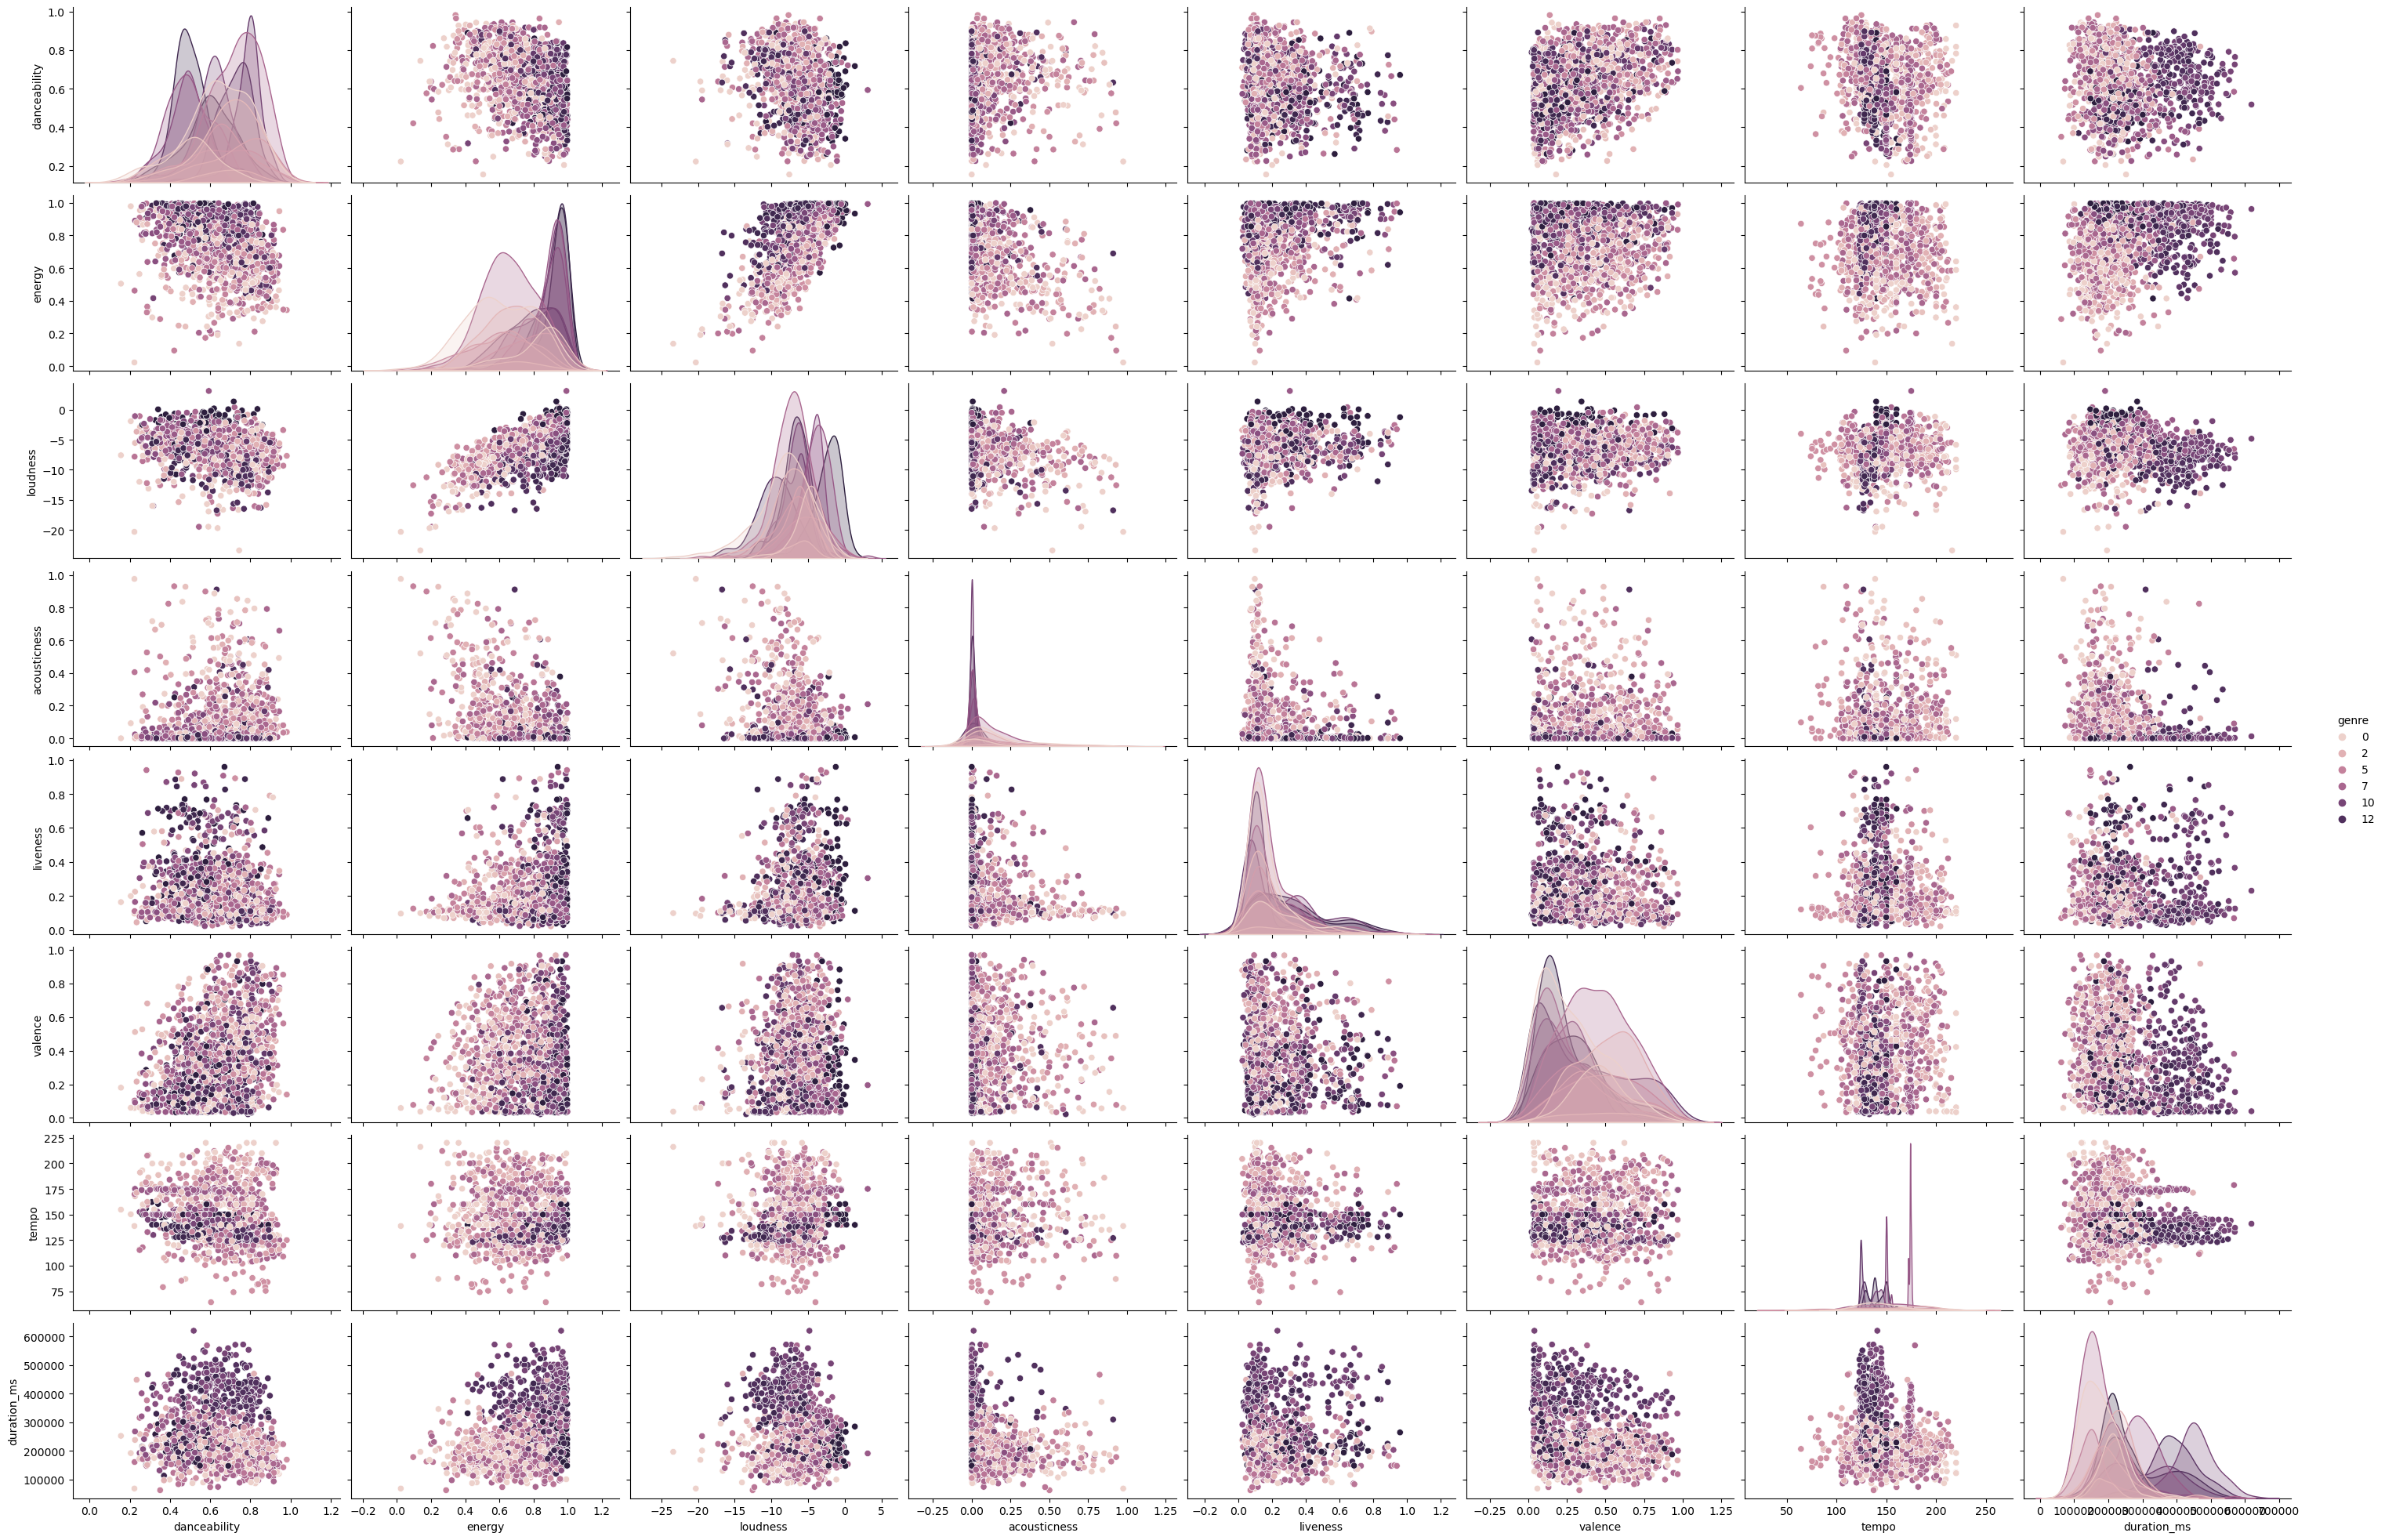

In [19]:
sns.pairplot(data=df, hue='genre', aspect=1.5)
plt.show()

C:\Users\online\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\online\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\online\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\online\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\online\anaconda3\Lib\site-packages\sklearn\

Text(0, 0.5, 'Inertia')

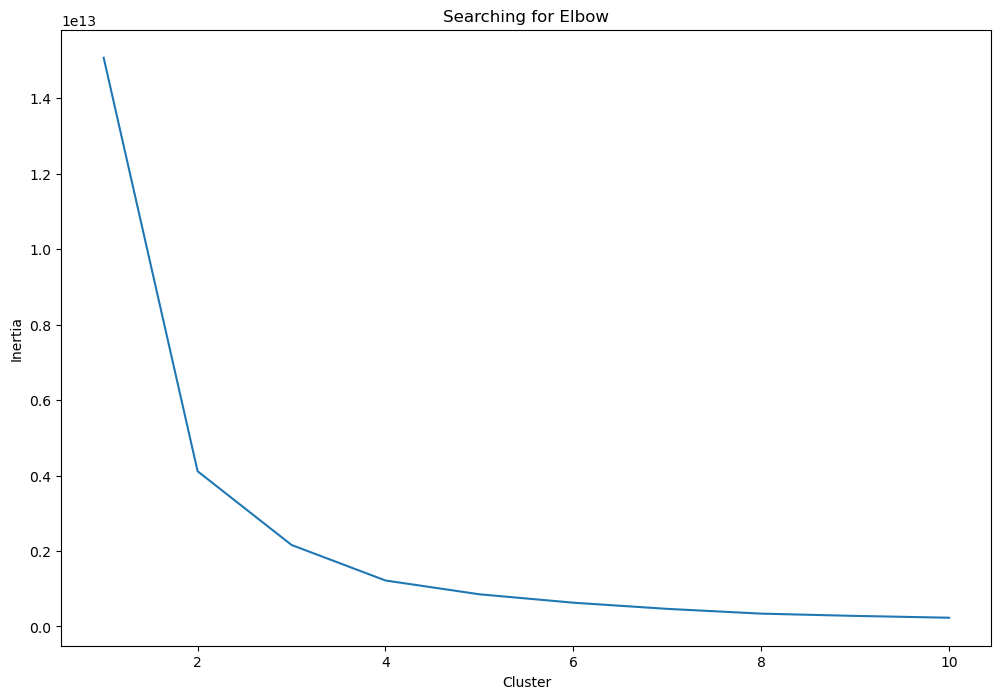

In [20]:
x = df.drop(["genre"], axis = 1)
cluster = []

for i in range(1,11):
    km = KMeans(n_clusters = i).fit(x)
    cluster.append(km.inertia_)

fig, ax = plt.subplots(figsize = (12, 8))
sns.lineplot(x = list(range(1,11)), y = cluster, ax = ax)
ax.set_title("Searching for Elbow")
ax.set_xlabel("Cluster")
ax.set_ylabel("Inertia")

In [21]:
x.columns

Index(['danceability', 'energy', 'loudness', 'acousticness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')

C:\Users\online\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


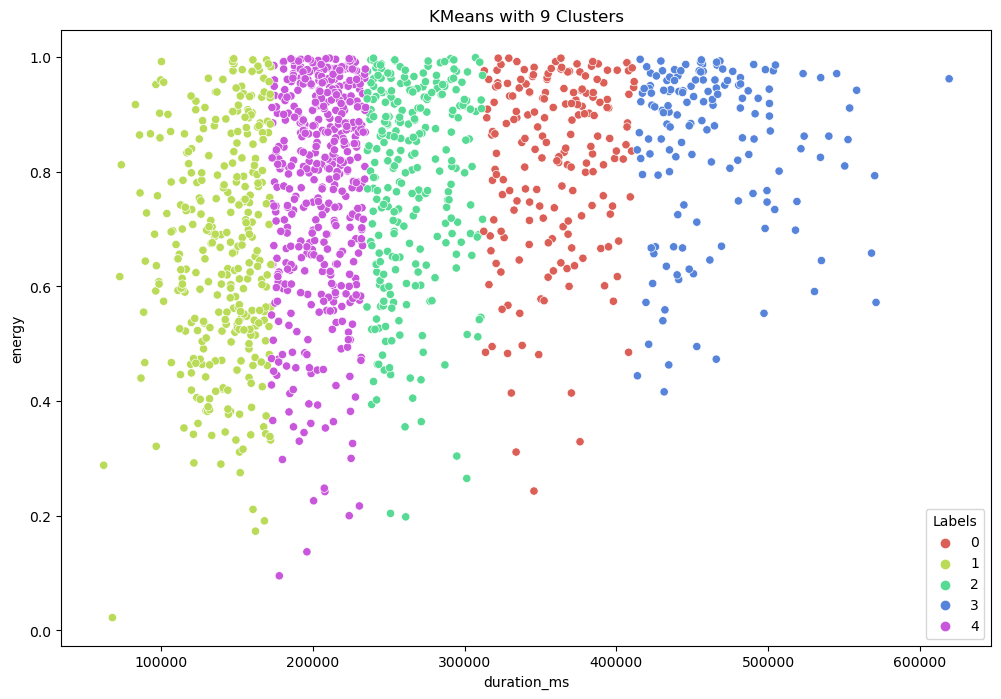

In [22]:
i = 5

km9 = KMeans(n_clusters = i).fit(x)

x["Labels"] = km9.labels_
plt.figure(figsize = (12,8))
sns.scatterplot(x = x["duration_ms"], y = x["energy"], hue = x["Labels"], palette = sns.color_palette("hls", i))
plt.title("KMeans with 9 Clusters")
plt.show()